In [ ]:
import pandas as pd
import os
import re
files =os.listdir("/home/ubuntu/downloads/netflix/training_set/")
# Read all files from the directory
df= pd.DataFrame()
for fil_index,fil in enumerate(files):
    if fil_index%100 ==0:
        print(fil_index)
    df_tmp =pd.read_csv("/home/ubuntu/downloads/netflix/training_set/"+fil)
    name = re.findall(r'\d+',fil)
    df_tmp=df_tmp.reset_index()
    df_tmp.columns = ['User', 'Rating','DoV']
    df_tmp['Mov'] = name * len(df_tmp)
    df = pd.concat([df,df_tmp],axis=0)
print('done')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
17000
17100
17200
17300
17400
17500
17600
17700
done


In [1]:
#read the basic file
import pandas as pd
import numpy as np
df = pd.read_pickle('nf')

In [20]:
h = {'User':['count'], 'Rating':['mean'] }
df_mov_g = df.groupby(['Mov','DoR']).agg(h).reset_index()
df_mov_g.columns = ['Mov', 'DoR', 'Rating_mean','User_count']
df_mov_g= df_mov_g.sort_values(['Mov','DoR'])
df_mov_g['first_day_mov'] = np.where(df_mov_g.Mov != df_mov_g.Mov.shift(1), 1, 0 )
df_mov_g= df_mov_g[df_mov_g['first_day_mov'] == 1]
df_mov_g.to_pickle('nf_mov_first')

In [30]:
import pandas as pd
df_mov_g= pd.read_pickle('nf_mov_first')

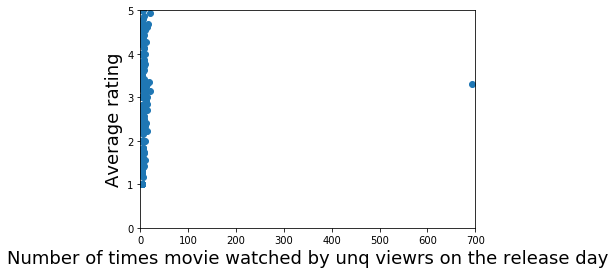

In [32]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
#df_tmp_g_sum.plot.scatter(User_count, Rating_mean)
plt.ylim((0,5))
plt.xlim((0,700))
plt.xlabel('Number of times movie watched by unq viewrs on the release day', fontsize=18)
plt.ylabel('Average rating', fontsize=18)
plt.scatter(df_mov_g.User_count, df_mov_g.Rating_mean) 
# Conclusion- To solve cold start problem for a movie, there is no pattern
# New Movies should be indexed by some meta data

In [41]:
#Producing temporary data structure  to use first timers
f = {'Mov':['count'], 'Rating':['mean'] }
df_usr_g = df.groupby(['User','DoR']).agg(f).reset_index()
df_usr_g.columns = ['User', 'DoR', 'Rating_mean','Mov_count']
df_usr_g= df_usr_g.sort_values(['User','DoR'])
df_usr_g['first_day_usr'] = np.where(df_usr_g.User != df_usr_g.User.shift(1), 1, 0 )
df_usr_g= df_usr_g[df_usr_g['first_day_usr'] == 1]
df_usr_g.to_pickle('nf_usr_first')

In [2]:
import pandas as pd
df_usr_g= pd.read_pickle('nf_usr_first')

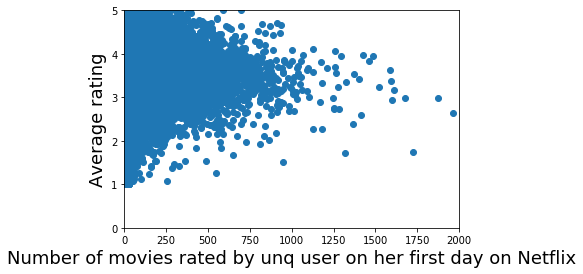

In [85]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
#df_tmp_g_sum.plot.scatter(User_count, Rating_mean)
plt.ylim((0,5))
plt.xlim((0,2000))
plt.xlabel('Number of movies rated by unq user on her first day on Netflix', fontsize=18)
plt.ylabel('Average rating', fontsize=18)
plt.scatter(df_usr_g.Mov_count, df_usr_g.Rating_mean) 
# Conclusion- To solve cold start problem for a user, there is no pattern
# New Users should be asked in some way
# However when users rate a lot of movie it reverts to mean

In [14]:
#create and store the primary file with days
df_join = pd.merge(df, df_usr_g, on='User', how='left')
df_join = df_join.drop(['Rating_mean','Mov_count','first_day_usr'], axis=1)
df_join['day_count'] = (df_join['DoR_x'] - df_join['DoR_y']).dt.days
df_join = df_join.drop(['DoR_y'], axis=1)
df_join.columns= ['User', 'Rating','Mov','DoR','day_count']
df_join.to_pickle('nf2')

In [49]:
import pandas as pd
import numpy as np
df_join = pd.read_pickle('nf2')

In [18]:
g = {'Rating':['mean', 'count' ,'std']}
df_time = df_join.groupby(['User','day_count']).agg(g).reset_index()
df_time.columns = ['User','day_count','rating_mean', 'rating_count', 'rating_std']


In [76]:
df_time.head(80000)

,User,day_count,rating_mean,rating_count,rating_std
0,6,0,3.764706,34,0.780785
1,6,4,5.000000,1,NaN
2,6,19,3.500000,2,0.707107
3,6,37,4.666667,3,0.577350
4,6,48,5.000000,2,0.000000
5,6,190,3.729167,48,0.983688
6,6,192,4.000000,3,1.000000
7,6,195,4.000000,1,NaN
8,6,196,3.000000,1,NaN
9,6,197,3.636364,22,1.216766


In [98]:
df_time_t= df_time[df_time['User']==6]

In [99]:
df_time_t.sort_values(['day_count'])

,User,day_count,rating_mean,rating_count,rating_std
0,6,0,3.764706,34,0.780785
1,6,4,5.000000,1,NaN
2,6,19,3.500000,2,0.707107
3,6,37,4.666667,3,0.577350
4,6,48,5.000000,2,0.000000
5,6,190,3.729167,48,0.983688
6,6,192,4.000000,3,1.000000
7,6,195,4.000000,1,NaN
8,6,196,3.000000,1,NaN
9,6,197,3.636364,22,1.216766


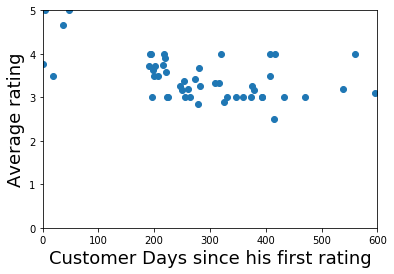

In [100]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
plt.ylim((0,5))
plt.xlim((0,600))
plt.xlabel('Customer Days since his first rating', fontsize=18)
plt.ylabel('Average rating', fontsize=18)
plt.scatter(df_time_t.day_count, df_time_t.rating_mean) 
#Users have a global baseline. They only like to rate above a baseline
#Hence models have to be designed to give special preference to low weights as heavily biased 
# towards positive ones
# some people have chosen to rank all the movies in a day 2040859 
# These users habitually rank all the movie

In [31]:
# Is there a change in taste of customer
#Is there a change in rating behaviour of customer in long term

In [38]:
# getting the word2vec representat
movie =df_join['Mov'].tolist()
day_count = df_join['day_count'].tolist()
sentence =[]
sentence_tmp = []
sentence_tmp.append(str(movie[0]))
for mov_ind, mov in enumerate(movie):
    if mov_ind%10000 ==0:
        print(mov_ind)
    if mov_ind > 0:
        if day_count[mov_ind] !=  day_count[mov_ind-1]:
            sentence.append(sentence_tmp)
            sentence_tmp = []
        sentence_tmp.append(str(mov))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [115]:
#Steps 3. vector representation of movies

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 3   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 1         # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
hs =1
negative =0
# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(sentence, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)

model_name = "100features_3minmovs_1context"
model.save(model_name)

2017-03-22 11:32:11,020 : INFO : collecting all words and their counts
2017-03-22 11:32:11,022 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-03-22 11:32:11,035 : INFO : PROGRESS: at sentence #10000, processed 59382 words, keeping 7056 word types
2017-03-22 11:32:11,048 : INFO : PROGRESS: at sentence #20000, processed 122313 words, keeping 10545 word types
2017-03-22 11:32:11,061 : INFO : PROGRESS: at sentence #30000, processed 181748 words, keeping 11610 word types
2017-03-22 11:32:11,073 : INFO : PROGRESS: at sentence #40000, processed 237682 words, keeping 12413 word types
2017-03-22 11:32:11,086 : INFO : PROGRESS: at sentence #50000, processed 293386 words, keeping 12860 word types
2017-03-22 11:32:11,099 : INFO : PROGRESS: at sentence #60000, processed 352179 words, keeping 13549 word types
2017-03-22 11:32:11,114 : INFO : PROGRESS: at sentence #70000, processed 422537 words, keeping 14074 word types
2017-03-22 11:32:11,127 : INFO : PROGRESS: at se

Training model...


2017-03-22 11:32:11,224 : INFO : PROGRESS: at sentence #150000, processed 909923 words, keeping 16014 word types
2017-03-22 11:32:11,238 : INFO : PROGRESS: at sentence #160000, processed 964238 words, keeping 16183 word types
2017-03-22 11:32:11,252 : INFO : PROGRESS: at sentence #170000, processed 1028731 words, keeping 16268 word types
2017-03-22 11:32:11,266 : INFO : PROGRESS: at sentence #180000, processed 1087371 words, keeping 16383 word types
2017-03-22 11:32:11,279 : INFO : PROGRESS: at sentence #190000, processed 1144642 words, keeping 16497 word types
2017-03-22 11:32:11,293 : INFO : PROGRESS: at sentence #200000, processed 1200630 words, keeping 16557 word types
2017-03-22 11:32:11,306 : INFO : PROGRESS: at sentence #210000, processed 1254815 words, keeping 16640 word types
2017-03-22 11:32:11,319 : INFO : PROGRESS: at sentence #220000, processed 1304811 words, keeping 16703 word types
2017-03-22 11:32:11,332 : INFO : PROGRESS: at sentence #230000, processed 1359646 words, k

In [116]:
model.doesnt_match(['0015124','00015164','0015246','0015436'])

#15124 - Independence day
# 15164 - X files
# 15246 - Alien 
# 15436 - perfect murder

'0015124'

In [114]:
model.wv.most_similar(positive=['0015164','0015246'], negative=['0015436'])
#model.score(['0015124','00015164','0015246','0015436'])

[('0008282', 0.7606229186058044),
 ('0012215', 0.7526155710220337),
 ('0012450', 0.7180099487304688),
 ('0016302', 0.6984715461730957),
 ('0010627', 0.672146201133728),
 ('0011815', 0.669359564781189),
 ('0013483', 0.6625054478645325),
 ('0014250', 0.6596548557281494),
 ('0008752', 0.6592778563499451),
 ('0012085', 0.6568726301193237)]

In [117]:
tr =[]
for item in range(1,17771):
    item_r = str('000000') + str(item)
    item_r = item_r[-7:]
    tr.append(model.wv[item_r])


In [118]:
tr= np.array(tr)

In [119]:
from sklearn.manifold import TSNE
model_tsne=TSNE(n_components=2)
vis_tsne = model_tsne.fit_transform(tr)

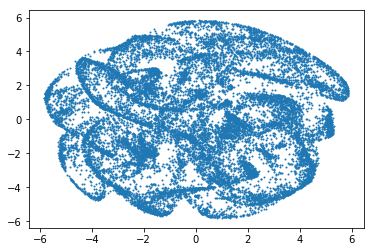

In [124]:
vis_x = vis_tsne[:, 0]
vis_y = vis_tsne[:, 1]
fig,ax = plt.subplots()
ax.scatter(vis_x, vis_y,s=1)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
model_tsne=TSNE(n_components=3)
vis_tsne3 = model_tsne.fit_transform(tr)

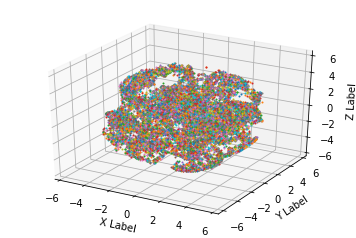

In [159]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for item in range(0, len(vis_tsne)):
    ax.scatter(vis_tsne3[item,0], vis_tsne3[item,1], vis_tsne3[item,2],s=1)
    #ax.text(vec[item,0], vec[item,1], vec[item,2], '%s' % (str(text[item])), size = 7,
                #zorder =1, color ='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [165]:
#Let us build the model 
df_h.to_pickle('train')

Timestamp('2004-03-09 00:00:00')

In [35]:
import pandas as pd
import gensim
df_h = pd.read_pickle(['train'])
model = gensim.models.Word2Vec.load("100features_3minmovs_1context")
print('done')

done


In [34]:
user = df_h['User'].tolist()
rating = df_h['Rating'].tolist()
mov = df_h['Mov'].tolist()
dor=  df_h['DoR'].tolist()

In [36]:
flag =[]
past_m = []
past_s =[]
current_m= []
current_s=[]
u =[]
user_dic={}
user_count =0
ag =[]
for counter in range(0, len(user)-5):
    # Users where we do not have the 5 movies in history will not be recommended from this model
    if user[counter]== user[counter+5]:
        # setting the flag
        if (dor[counter+5] - dor[counter]).days > 30:
            flag.append(1)
        else:
            flag.append(0)
        # setting the user
        try:
            user_dic[user[counter]]
        except:
            user_count = user_count + 1
            user_dic[user[counter]] = user_count
        past_m_tmp =[]
        past_s_tmp = []
        for c in range(0,5):
            past_m_tmp.append(model.wv[mov[counter+c]])
            past_s_tmp.append(rating[counter+c])
        past_m.append(past_m_tmp)
        past_s.append(past_s_tmp)
        ag.append(sum(past_s_tmp)/5)
        current_m.append(model.wv[mov[counter+5]])
        current_s.append(rating[counter+5])
        u.append(user_dic[user[counter]])
    else:
        pass
print('done')  

done


In [37]:
df_train = pd.DataFrame()
df_train['user'] = u
df_train['past_m']= past_m
df_train['past_s']= past_s
df_train['current_m'] = current_m
df_train['current_s'] = current_s
df_train['ag'] = ag
df_train['flag'] = flag

In [45]:
df_train.to_pickle('train_mod')

In [1]:
import pandas as pd
df_train = pd.read_pickle('train_mod')
df_train = df_train.sample(frac=1)
df_train_r = df_train[((df_train['flag']== 0) & (df_train['ag'] < 2.5)) | \
                     ((df_train['flag']== 0) & (df_train['ag'] > 3.5))]

In [5]:
import numpy as np
X1= np.array(df_train_r['past_m'].tolist())
X1=X1.reshape(len(X1),5, 100,1)
X2= np.array(df_train_r['past_s'].tolist())
X2=X2.reshape(len(X2),5)
X4= np.array(df_train_r['current_m'].tolist())
X4=X4.reshape(len(X4),1,100)

In [7]:
from keras.layers import Embedding
from keras.layers import Input, Convolution2D, Dense, merge, Flatten, Dropout, MaxPooling2D, Input, Reshape
from keras.models import Model
X3= np.random.random((250,100))
MAX_SEQUENCE_LENGTH = 1
EMBEDDING_DIM =100
embedding_layer = Embedding(250,
                            EMBEDDING_DIM,
                            weights=[X3],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedded_sequences = embedding_layer(sequence_input)
em = np.array(df_train_r['user'].tolist())

In [11]:
y= np.array(df_train_r['current_s'].tolist())
y= y.reshape(len(y),1)
y_class = []
for g in range(0, len(y)):
    tmp = [0] * 5
    tmp[y[g]-1] = 1
    y_class.append(tmp)
y_class = np.array(y_class).reshape(len(y_class),1,5)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [ ]:
#building the model in Keras with 2 models sharing the weights

from keras.layers import Input, Convolution2D, Dense, merge, Flatten, Dropout, MaxPooling2D, Input, Reshape
from keras.models import Model

pool_size = (2, 1)
max_val=5
nb_epoch=10
batch_size=128
# convolution kernel size
nb_filters = 1200
kernel_size1 = (1, 100)

print('start...')

#Input1
img1 = Input(shape=(max_val, 100,1))#Just the shape matters hence addition of 1 

#Convolution

img1_layer1 = Convolution2D(nb_filters, kernel_size1[0], kernel_size1[1],
                        border_mode='valid',activation='relu')(img1)

#Aggregating the filter output by flattening and comparing the value
img1_layer2= Flatten()(img1_layer1)
img1_layer3 = Dense(5)(img1_layer2)
#Input2

img2 = Input(shape=(5,))#Just the shape matters hence addition of 1 

# Merging them

merge_layer1 = merge([img1_layer3, img2], mode = 'sum')
merge_layer1_expand = Dense(100)(merge_layer1 )
reshape = Reshape((1,100))(merge_layer1_expand)
# Bringing embedding layer ,  current movie and the flag
img3 = Input(shape=(1,100))
merge_layer2 = merge([embedded_sequences, img3,], mode = 'sum')
merge_layer3 = merge([merge_layer2 , reshape], mode = 'sum')
#img1_layer4 = Dense(5, activation ='relu')(merge_layer2)

predictions = Dense(5, activation='softmax')(merge_layer3)


model = Model(input=[img1, img2, sequence_input,img3 ], output=[predictions] )

model.compile(loss='categorical_crossentropy',
              optimizer= 'adagrad',
              metrics=['accuracy'])

model.fit([X1[:640000],X2[:640000], em[:640000],X4[:640000]], y_class[:640000], batch_size=batch_size, nb_epoch=nb_epoch,
           validation_data=([X1[640000:],X2[640000:], em[640000:],X4[640000:]],[y_class[640000:]]),verbose=1)
print('done')


start...
Train on 640000 samples, validate on 3828 samples
Epoch 1/10
640000/640000 [==============================] - 33s - loss: 1.1012 - acc: 0.5315 - val_loss: 1.0682 - val_acc: 0.5455

In [23]:
# Prediction on 4000 Recommendations
predicted = model.predict([X1[640000:],X2[640000:], em[640000:],X4[640000:]], verbose=0) 
pr1 = []
pr2 =[]
for rows in range(0,len(predicted)):
    score= np.argsort(predicted[rows])[-2:][0]
    pr1.append(score[-1]+1)
    pr2.append(score[-2]+1)
df_visual = pd.DataFrame()
df_visual['User'] = em[640000:]
df_visual['Actual'] = y[640000:,0]
df_visual['Rating1_score'] = predicted[:,0,0]
df_visual['Rating2_score'] = predicted[:,0,1]
df_visual['Rating3_score'] = predicted[:,0,2]
df_visual['Rating4_score'] = predicted[:,0,3]
df_visual['Rating5_score'] = predicted[:,0,4]
df_visual['First_Predicted_Rating'] =  pr1
df_visual['Second_Predicted_Rating'] =  pr2
df_visual_good = df_visual[(df_visual['Actual'] == df_visual['First_Predicted_Rating'] ) | (df_visual['Actual'] == df_visual['Second_Predicted_Rating'] )]
df_visual_bad = df_visual[(df_visual['Actual'] != df_visual['First_Predicted_Rating'] ) & (df_visual['Actual'] != df_visual['Second_Predicted_Rating'] )]

print('done')

done


In [24]:
df_visual

,User,Actual,Rating1_score,Rating2_score,Rating3_score,Rating4_score,Rating5_score,First_Predicted_Rating,Second_Predicted_Rating
0,34,1,0.639231,0.291591,0.060861,0.007044,0.001273,1,2
1,129,4,0.003013,0.009137,0.245888,0.647737,0.094225,4,3
2,248,3,0.006823,0.601184,0.124858,0.139435,0.127701,2,4
3,218,4,0.067907,0.165924,0.186249,0.283338,0.296582,5,4
4,243,2,0.267420,0.243657,0.277287,0.147871,0.063764,3,1
5,20,3,0.007175,0.077190,0.340385,0.387530,0.187720,4,3
6,228,1,0.901016,0.029609,0.040979,0.015429,0.012967,1,3
7,199,3,0.034285,0.078074,0.206315,0.270081,0.411243,5,4
8,206,4,0.001716,0.066882,0.266139,0.505623,0.159639,4,3
9,166,4,0.046996,0.112620,0.334739,0.313182,0.192464,3,4


In [25]:
df_visual_good

,User,Actual,Rating1_score,Rating2_score,Rating3_score,Rating4_score,Rating5_score,First_Predicted_Rating,Second_Predicted_Rating
0,34,1,0.639231,0.291591,0.060861,0.007044,0.001273,1,2
1,129,4,0.003013,0.009137,0.245888,0.647737,0.094225,4,3
3,218,4,0.067907,0.165924,0.186249,0.283338,0.296582,5,4
5,20,3,0.007175,0.077190,0.340385,0.387530,0.187720,4,3
6,228,1,0.901016,0.029609,0.040979,0.015429,0.012967,1,3
8,206,4,0.001716,0.066882,0.266139,0.505623,0.159639,4,3
9,166,4,0.046996,0.112620,0.334739,0.313182,0.192464,3,4
10,97,2,0.003200,0.834172,0.160862,0.001464,0.000300,2,3
11,25,2,0.460348,0.193814,0.179433,0.106986,0.059419,1,2
12,228,1,0.958141,0.016455,0.016778,0.004895,0.003731,1,3


In [26]:
df_visual_bad

,User,Actual,Rating1_score,Rating2_score,Rating3_score,Rating4_score,Rating5_score,First_Predicted_Rating,Second_Predicted_Rating
2,248,3,0.006823,0.601184,0.124858,0.139435,0.127701,2,4
4,243,2,0.267420,0.243657,0.277287,0.147871,0.063764,3,1
7,199,3,0.034285,0.078074,0.206315,0.270081,0.411243,5,4
24,219,2,0.438952,0.162060,0.187957,0.112841,0.098190,1,3
27,156,2,0.888927,0.045141,0.045321,0.016536,0.004074,1,3
29,242,2,0.041407,0.195606,0.326304,0.299269,0.137414,3,4
33,155,3,0.307814,0.373365,0.230554,0.047083,0.041184,2,1
35,75,4,0.176054,0.135562,0.514931,0.140349,0.033104,3,1
38,166,4,0.607369,0.164232,0.161519,0.052561,0.014319,1,2
39,99,4,0.812765,0.077923,0.068304,0.029040,0.011968,1,2
